<a href="https://colab.research.google.com/github/KarolinaGoss/UW-API-mgr1/blob/main/projekt_zaliczeniowy_Karolina_Goss_grupa2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import datetime
df = pd.read_csv("/content/drive/MyDrive/dane4.csv")

In [2]:
dni_tygodnia = {
    "Mon": "Poniedziałek",
    "Tue": "Wtorek",
    "Wed": "Środa",
    "Thu": "Czwartek",
    "Fri": "Piątek",
    "Sat": "Sobota",
    "Sun": "Niedziela",
}

df['created_at'] = pd.to_datetime(df['created_at'])
df['dzien_tygodnia'] = df['created_at'].dt.strftime('%a')
df['dzien_tygodnia'] = df['dzien_tygodnia'].map(dni_tygodnia)
df['created_at'] = df['dzien_tygodnia'] + ' ' + df['created_at'].dt.strftime('%b %d %H:%M:%S %z %Y')
df.drop('dzien_tygodnia', axis=1, inplace=True)


In [3]:
miesiace = {
    "Jan": "01",
    "Feb": "02",
    "Mar": "03",
    "Apr": "04",
    "May": "05",
    "Jun": "06",
    "Jul": "07",
    "Aug": "08",
    "Sep": "09",
    "Oct": "10",
    "Nov": "11",
    "Dec": "12",
}
df['user_created_at'] = pd.to_datetime(df['user_created_at'])
df['miesiace'] = df['user_created_at'].dt.strftime('%b')
df['miesiace'] = df['miesiace'].map(miesiace)
df['user_created_at'] = df['user_created_at'].dt.strftime('%a') + ' ' + df['miesiace'] + ' ' + df['user_created_at'].dt.strftime('%d %H:%M:%S %z %Y')
df.drop('miesiace', axis=1, inplace=True)

In [ ]:
print(df.user_created_at)

0      Wed 02 09 19:19:00 +0000 2022
1      Sat 01 25 21:51:32 +0000 2020
2      Mon 02 27 00:24:11 +0000 2017
3      Sun 12 25 09:34:19 +0000 2016
4      Thu 05 19 03:54:12 +0000 2011
                   ...              
695    Wed 09 02 20:23:32 +0000 2009
696    Mon 11 29 17:54:11 +0000 2021
697    Fri 08 17 09:16:26 +0000 2018
698    Thu 12 09 06:17:27 +0000 2021
699    Fri 01 28 15:36:43 +0000 2022
Name: user_created_at, Length: 700, dtype: object


In [ ]:
lista_linkow = df['tweet_url'].to_list()
lista_linkow

In [7]:
from numpy import nan

In [ ]:
lista_linkow_tw = df['urls'].to_list()
linki_do_tw = [item for item in lista_linkow_tw if not(pd.isnull(item)) == True]
linki_do_tw

In [ ]:
lista_media = df['media'].to_list()
lista_linkow_media = [item for item in lista_media if not(pd.isnull(item)) == True]
lista_linkow_media

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
slowa_do_usuniecia = set(stopwords.words('spanish')) | set(stopwords.words('english')) #sprawdzałam i nie ma polskiego :(
df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([slowo for slowo in x.split() if slowo not in (slowa_do_usuniecia)]))
df[['text', 'text_without_stopwords']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,text_without_stopwords
0,@matipniewski Wydaje mi się że Twitter to miej...,@matipniewski Wydaje się że Twitter miejsce na...
1,"Apple grozi, że usunie Twittera ze swojego skl...","Apple grozi, że usunie Twittera ze swojego skl..."
2,Mano do nada o elon musk kkkkkkkkkk,Mano elon musk kkkkkkkkkk
3,@MussaBabaleo2 kwani we ndio elon musk,@MussaBabaleo2 kwani ndio elon musk
4,"@elonmusk What do you mean(wdym elon?, Wdym mu...","@elonmusk What mean(wdym elon?, Wdym musk?, Wd..."
...,...,...
695,Wkrótce po przejęciu platformy przez #ElonMusk...,Wkrótce po przejęciu platformy przez #ElonMusk...
696,@dudinha_fritz @elonmusk o Elon Musk?,@dudinha_fritz @elonmusk Elon Musk?
697,"To nie ja udostępniam, tylko Twitter. Elon Mus...","To nie ja udostępniam, tylko Twitter. Elon Mus..."
698,E. Musk może pogrążyć Twittera w jeszcze więks...,E. Musk może pogrążyć Twittera w jeszcze więks...


In [ ]:
df = df.sort_values('favorite_count', ascending = False)
df.head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
648,NaN,Poniedziałek Nov 21 11:06:57 +0000 2022,NaN,NaN,NaN,7680,1594648556874641408,NaN,NaN,NaN,...,2942,102,7,Poland,Magdalena W.,MagdalenaW_,7160,NaN,NaN,False
57,NaN,Poniedziałek Nov 28 12:39:29 +0000 2022,NaN,https://twitter.com/musicnewsfactpl/status/159...,NaN,1442,1597208558852255744,NaN,NaN,NaN,...,60066,6606,72,NaN,MNFPL,musicnewsfactpl,20569,NaN,NaN,False
309,NaN,Piątek Nov 25 07:51:09 +0000 2022,NaN,NaN,NaN,961,1596048833766572032,NaN,NaN,NaN,...,97734,142,123,Night City,Osiem Gwiazd,RuchOsmiuGwiazd,18732,NaN,https://www.facebook.com/OsiemGwiazd2.0,False
294,NaN,Czwartek Nov 24 22:20:40 +0000 2022,NaN,NaN,NaN,440,1595905264599064576,NaN,NaN,NaN,...,10233,31,122,"Bromley, London",Seb Ross 🇵🇱🇬🇧,SebRoss4,18616,NaN,NaN,False
457,NaN,Środa Nov 23 14:36:43 +0000 2022,NaN,NaN,https://twitter.com/elonmusk/status/1595250835...,182,1595426122904338434,NaN,NaN,NaN,...,336159,4136,595,Polska,Krzysztof Bosak 🇵🇱,krzysztofbosak,124829,NaN,NaN,True


In [ ]:
df = df.sort_values('retweet_count', ascending = False)
df.head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
309,NaN,Piątek Nov 25 07:51:09 +0000 2022,NaN,NaN,NaN,961,1596048833766572032,NaN,NaN,NaN,...,97734,142,123,Night City,Osiem Gwiazd,RuchOsmiuGwiazd,18732,NaN,https://www.facebook.com/OsiemGwiazd2.0,False
55,NaN,Wtorek Nov 29 00:32:08 +0000 2022,NaN,NaN,https://www.tysol.pl/a95446-opinia-publiczna-z...,40,1597387900202942464,NaN,NaN,NaN,...,3566,4975,19,"Wrocław, Poland",Janko Walski,WalskiJ,178586,NaN,http://naszeblogi.pl/blog/214,False
57,NaN,Poniedziałek Nov 28 12:39:29 +0000 2022,NaN,https://twitter.com/musicnewsfactpl/status/159...,NaN,1442,1597208558852255744,NaN,NaN,NaN,...,60066,6606,72,NaN,MNFPL,musicnewsfactpl,20569,NaN,NaN,False
236,NaN,Piątek Nov 25 21:18:04 +0000 2022,NaN,NaN,https://www.ft.com/content/f9fdace4-5eb2-4db2-...,134,1596251897920475137,NaN,NaN,NaN,...,12651,23,76,Między Paryżem a Wandeą,Adam Gwiazda,delestoile,53952,NaN,NaN,False
47,NaN,Wtorek Nov 29 00:29:29 +0000 2022,NaN,NaN,https://www.tysol.pl/a95446-opinia-publiczna-z...,84,1597387234877267969,NaN,NaN,NaN,...,64638,6245,201,NaN,Pan Cezary Krysztopa #BabiesLivesMatter,cezarykrysztopa,334863,NaN,http://www.tysol.pl,False


In [ ]:
df[df['possibly_sensitive'] == False]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
55,NaN,Wtorek Nov 29 00:32:08 +0000 2022,NaN,NaN,https://www.tysol.pl/a95446-opinia-publiczna-z...,40,1597387900202942464,NaN,NaN,NaN,...,3566,4975,19,"Wrocław, Poland",Janko Walski,WalskiJ,178586,NaN,http://naszeblogi.pl/blog/214,False
57,NaN,Poniedziałek Nov 28 12:39:29 +0000 2022,NaN,https://twitter.com/musicnewsfactpl/status/159...,NaN,1442,1597208558852255744,NaN,NaN,NaN,...,60066,6606,72,NaN,MNFPL,musicnewsfactpl,20569,NaN,NaN,False
47,NaN,Wtorek Nov 29 00:29:29 +0000 2022,NaN,NaN,https://www.tysol.pl/a95446-opinia-publiczna-z...,84,1597387234877267969,NaN,NaN,NaN,...,64638,6245,201,NaN,Pan Cezary Krysztopa #BabiesLivesMatter,cezarykrysztopa,334863,NaN,http://www.tysol.pl,False
293,NaN,Piątek Nov 25 14:13:39 +0000 2022,NaN,https://twitter.com/myslozbir/status/159614509...,NaN,134,1596145092599099392,NaN,NaN,NaN,...,15645,1927,41,Polska/Berlin,Myślozbir,myslozbir,19296,NaN,https://www.youtube.com/myslozbrodnia,False
457,NaN,Środa Nov 23 14:36:43 +0000 2022,NaN,NaN,https://twitter.com/elonmusk/status/1595250835...,182,1595426122904338434,NaN,NaN,NaN,...,336159,4136,595,Polska,Krzysztof Bosak 🇵🇱,krzysztofbosak,124829,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,NaN,Poniedziałek Nov 28 19:13:28 +0000 2022,NaN,https://twitter.com/dawnmaskedindiv/status/159...,NaN,1,1597307706343583744,_RGarts_,1.597306e+18,1.039223e+18,...,648,2805,7,yo mama/ 🇧🇷,🍢 S'more! ,dawnmaskedindiv,80894,NaN,NaN,False
532,NaN,Wtorek Nov 22 06:36:16 +0000 2022,spidersweb,NaN,https://spidersweb.pl/2022/11/twitter-koniec-z...,1,1594942825631977472,NaN,NaN,NaN,...,21421,240,257,Polska,SPIDER'S WEB,SpidersWebPL,66740,NaN,http://www.spidersweb.pl,False
414,NaN,Środa Nov 23 11:22:14 +0000 2022,NaN,NaN,https://www.pb.pl/musk-tesla-postrzega-koree-p...,1,1595377179491180544,NaN,NaN,NaN,...,60664,42,486,Warszawa/Warsaw,Puls Biznesu,puls_biznesu,45251,NaN,http://www.pb.pl,True
51,NaN,Wtorek Nov 29 01:13:09 +0000 2022,NaN,NaN,https://life.fakty.com.ua/ua/tekhnolohii/mask-...,1,1597398222708051968,NaN,NaN,NaN,...,12732,12732,28,NaN,Polskie_Sluzby,PolskieSluzby,198195,NaN,NaN,False


In [ ]:
df['user_created_at'] = pd.to_datetime(df['user_created_at'])
df = df.sort_values('user_created_at')
df[df['user_id'] == df['user_id'].iloc[0]]


,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
255,NaN,Sobota Nov 26 08:51:58 +0000 2022,NaN,NaN,https://fortune.com/2022/11/24/elon-musk-sacks...,5,1596426525439664128,NaN,NaN,NaN,...,10096,530,283,"Nowa Huta, Polska",𝗦𝘁𝗮𝗻𝗶𝘀ł𝗮𝘄 𝗠. 𝗦𝘁𝗮𝗻𝘂𝗰𝗵 🇵🇱,dziennikarz,39164,NaN,http://www.dziennikarz.pl,True


In [ ]:
df = df.sort_values('user_followers_count', ascending = False)
df[df['user_name'] == df['user_name'].iloc[0]]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
506,NaN,Wtorek Nov 22 09:56:36 +0000 2022,NaN,NaN,https://tvn24.pl/swiat/usa-alex-jones-wroci-na...,7,1594993241010581504,NaN,NaN,NaN,...,1912915,71,2129,Poland,tvn24,tvn24,370661,NaN,http://www.tvn24.pl,True
261,NaN,Sobota Nov 26 08:09:38 +0000 2022,NaN,NaN,https://tvn24.pl/swiat/usa-elon-musk-zapowiedz...,15,1596415870611472385,NaN,NaN,NaN,...,1912915,71,2129,Poland,tvn24,tvn24,370661,NaN,http://www.tvn24.pl,True


In [ ]:
df[df['user_verified'] == True]

Konwertujemy na datę created at
Oddzielamy dni do oddzielnej kolumny
Sumujemy (jakaś metoda pandas) ile razy występują dni
Wyświetlamy z tego jednego dnia
https://colab.research.google.com/drive/1yTt8ppTnmJYEx4yfrP_r9LWBaq9J8LLa?authuser=1&hl=pl moze sie przyda

In [ ]:
df['dzien_tygodnia'] = pd.to_datetime(df['created_at']).dt.strftime('%a')
df['dzien_tygodnia'].value_counts()[0:1]

Mon    197
Name: dzien_tygodnia, dtype: int64

In [ ]:
!pip install spacy -U

In [ ]:

!python -m spacy download pl_core_news_lg

import spacy
nlp = spacy.load("pl_core_news_lg")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.7/573.7 MB 1.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:

df["osoby"] = df["text"].apply(lambda text: [ent for ent in nlp(text).ents if ent.label_ == "persName"])
df["osoby"]

0                             [(Twitter)]
1                          [(Elon, Musk)]
2      [(Mano), (elon, musk, kkkkkkkkkk)]
3        [(@MussaBabaleo2), (elon, musk)]
4                                      []
                      ...                
695         [(#, ElonMusk), (#, twitter)]
696                        [(Elon, Musk)]
697             [(Twitter), (Elon, Musk)]
698                    [(E, .), (Trumpa)]
699                        [(Elon, Musk)]
Name: osoby, Length: 700, dtype: object

In [ ]:
df["miejsca"] = df["text"].apply(lambda text: [ent for ent in nlp(text).ents if ent.label_ == "placeName"])

df["miejsca"]

0      [(@matipniewski)]
1                     []
2                     []
3                     []
4                     []
             ...        
695                   []
696                   []
697                   []
698                   []
699                   []
Name: miejsca, Length: 700, dtype: object

In [ ]:
df["organizacje"] = df["text"].apply(lambda text: [ent for ent in nlp(text).ents if ent.label_ == "orgName"])

df["organizacje"]

0                             []
1                      [(Apple)]
2                             []
3                             []
4                             []
                 ...            
695                           []
696                           []
697             [(Konfederacji)]
698    [(Musk), (CNN, Business)]
699                           []
Name: organizacje, Length: 700, dtype: object

In [ ]:
import matplotlib.pyplot as plt

Fri     68
Mon    197
Sat     91
Sun    108
Thu     51
Tue    130
Wed     55
Name: dzien_tygodnia, dtype: int64

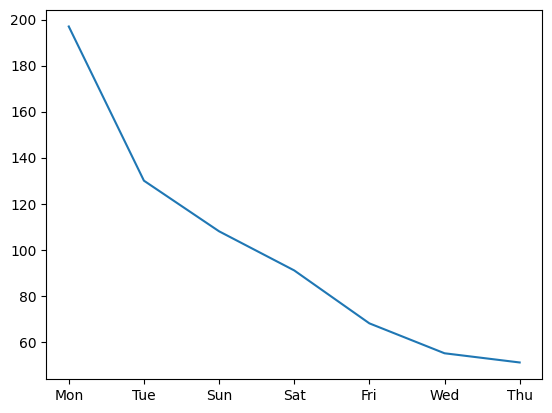

In [ ]:

tweety_danego_dnia = df['dzien_tygodnia'].value_counts()

p = plt.plot(tweety_danego_dnia.index, tweety_danego_dnia.values)
tweety_danego_dnia.sort_index()

In [ ]:
#df.drop('dzien_tygodnia', axis=1, inPlace=True)